<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/toxic_comment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
with ZipFile("/content/drive/MyDrive/Colab Notebooks/NLP/Data/test.csv.zip", 'r') as zObject:
    zObject.extractall(
        path="/content/drive/MyDrive/Colab Notebooks/NLP/Data/")


In [3]:
with ZipFile("/content/drive/MyDrive/Colab Notebooks/NLP/Data/train.csv.zip", 'r') as zObject:
    zObject.extractall(
        path="/content/drive/MyDrive/Colab Notebooks/NLP/Data/")

In [4]:
with ZipFile("/content/drive/MyDrive/Colab Notebooks/NLP/Data/test_labels.csv.zip", 'r') as zObject:
    zObject.extractall(
        path="/content/drive/MyDrive/Colab Notebooks/NLP/Data/")

In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Data/train.csv")


In [5]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Data/test.csv")


In [7]:
test_df.head()


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
test_labels_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Data/test_labels.csv")

In [8]:
test_labels_df.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [8]:
train_df.shape

(159571, 8)

Create corpus
- clean
- separate on words


In [9]:
count_words = [len(s) for s in train_df.comment_text.str.split()]

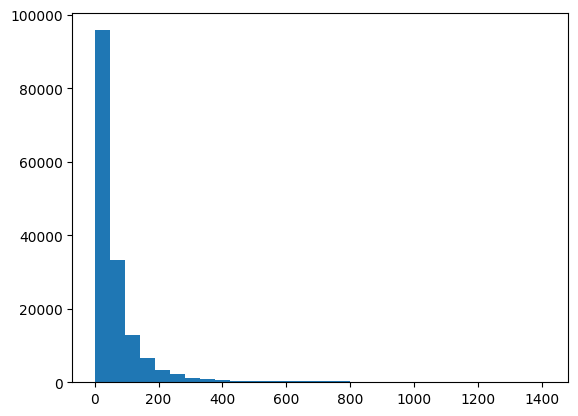

In [10]:
plt.hist(count_words, 30)
plt.show()

In [11]:
np.quantile(count_words, 0.95)


230.0

In [47]:
MAX_LENGHT = 230
VOCABULARY_SIZE = 100000

In [101]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

class TextTokenizer():

  def __init__(self, max_vocab_size=VOCABULARY_SIZE, max_len=MAX_LENGHT, oov_token=""):
    self.tokenizer = Tokenizer(
        num_words=max_vocab_size,
        filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n',
        lower=True,
        split=' ',
        oov_token=oov_token)
    self.max_vocab_size = max_vocab_size
    self.max_len = max_len
    self.oov_token = oov_token
  def fit(self, X):
    self.tokenizer.fit_on_texts(X)

  def transform(self, X):
    seq = self.tokenizer.texts_to_sequences(X)
    return pad_sequences(seq, maxlen=self.max_len,padding='post',truncating='post')

  def fit_transform(self, X):
    self.fit(X)
    return self.transform(X)

In [49]:
# split data to train and val
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)


In [50]:
train_df.shape, val_df.shape


((102124, 8), (25532, 8))

In [51]:
tokenizer = TextTokenizer()
tokenizer.fit(train_df.comment_text)


In [52]:
len(tokenizer.tokenizer.word_index)

159573

In [102]:
train_df.iloc[0].comment_text

'.  And that would verify that John was a Pratt grad w/ BA/BS in Graphic Art'

In [103]:
text = train_df.iloc[0].comment_text

print(text)
print(len(text.split()))

vector = tokenizer.transform([text])
print(vector.shape)
print(vector)

.  And that would verify that John was a Pratt grad w/ BA/BS in Graphic Art
16
(1, 230)
[[    4    10    48  1678    10   760    25     6 26759 12147   910  7220
   4276    11  4927  1427     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     

In [110]:
# create a model that include the text vectorization
def get_model(output_size):
  inputs = tf.keras.layers.Input(shape=(MAX_LENGHT,))
  x = tf.keras.layers.Embedding(VOCABULARY_SIZE, MAX_LENGHT)(inputs)
  x = tf.keras.layers.LSTM(256)(x)
  x = tf.keras.layers.Dense(128, 'relu')(x)
  x = tf.keras.layers.Dropout(0.4)(x)
  x = tf.keras.layers.Dense(64, 'relu')(x)
  outputs = tf.keras.layers.Dense(output_size, 'sigmoid')(x)

  model = tf.keras.models.Model(inputs, outputs)

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [105]:
# build train and validation_data

target_columns = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

# tokenizer data
train_data = tokenizer.fit_transform(train_df.comment_text)
val_data = tokenizer.transform(val_df.comment_text)

# create dataset
train_data= tf.data.Dataset.from_tensor_slices((train_data, train_df[target_columns]))
train_data= train_data.batch(32).prefetch(tf.data.AUTOTUNE)


val_data= tf.data.Dataset.from_tensor_slices((val_data, val_df[target_columns]))
val_data= val_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [106]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 230), dtype=tf.int32, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

In [112]:
# create and train model
model = get_model( len(target_columns))

ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[ES])



Epoch 1/10
3192/3192 [==============================] - 146s 45ms/step - loss: 0.1446 - accuracy: 0.9448 - val_loss: 0.1393 - val_accuracy: 0.9941
Epoch 2/10
3192/3192 [==============================] - 70s 22ms/step - loss: 0.1373 - accuracy: 0.9902 - val_loss: 0.1372 - val_accuracy: 0.9941
Epoch 3/10
3192/3192 [==============================] - 70s 22ms/step - loss: 0.0949 - accuracy: 0.9934 - val_loss: 0.0616 - val_accuracy: 0.9941
Epoch 4/10
3192/3192 [==============================] - 70s 22ms/step - loss: 0.0535 - accuracy: 0.9918 - val_loss: 0.0532 - val_accuracy: 0.9941
Epoch 5/10
3192/3192 [==============================] - 70s 22ms/step - loss: 0.0428 - accuracy: 0.9928 - val_loss: 0.0522 - val_accuracy: 0.9941
Epoch 6/10
3192/3192 [==============================] - 70s 22ms/step - loss: 0.0374 - accuracy: 0.9918 - val_loss: 0.0558 - val_accuracy: 0.9941
Epoch 7/10
3192/3192 [==============================] - 70s 22ms/step - loss: 0.0337 - accuracy: 0.9936 - val_loss: 0.0601 

In [113]:
model.evaluate(val_data)


798/798 [==============================] - 6s 7ms/step - loss: 0.0522 - accuracy: 0.9941


[0.05221111699938774, 0.9941250085830688]

In [115]:
test_df.head()


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [116]:
test_data = tokenizer.transform(test_df.comment_text)


In [118]:
prediction = model.predict(test_data)



4787/4787 [==============================] - 28s 6ms/step


In [122]:
prediction = np.round(prediction, 2)
prediction

array([[1.  , 0.31, 0.94, 0.04, 0.82, 0.14],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.91, 0.02, 0.45, 0.02, 0.4 , 0.05]], dtype=float32)

In [123]:
test_df[target_columns] = prediction



In [124]:
test_df.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,1.00,0.31,0.94,0.04,0.82,0.14
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0.00,0.00,0.00,0.00,0.00,0.00
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.01,0.00,0.00,0.00,0.00,0.00
3,00017563c3f7919a,":If you have a look back at the source, the in...",0.00,0.00,0.00,0.00,0.00,0.00
4,00017695ad8997eb,I don't anonymously edit articles at all.,0.00,0.00,0.00,0.00,0.00,0.00


In [125]:
model.save('model.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
